In [2]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import math
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('font', family='serif')
mpl.rc('figure',  figsize=(3.15,3.15), dpi=50)
mpl.rc('xtick', labelsize='x-small')
mpl.rc('ytick', labelsize='x-small')

een verhaaltje typen

In [3]:
Experiment=['blanco','20 uM','50 uM', '100 uM', '125 uM', '150 um', '170 um', '200 um']

track_data_blanco = {}
sum_track_blanco = {}
track_data = {}
sum_track = {}


for i in range(len(Experiment)):
    saveas=f'track_data_{Experiment[i]}_total.csv'
    if i==0:
        n=8
        for x in range(n):
            h=x+1
            track_data_blanco[x]=pd.read_csv(f'cilio/{Experiment[i]}/singlecell_{Experiment[i]}_{h}.csv')
            track_data_blanco[x].set_index('lag time [s]', inplace=True)    
            Displacement=np.sqrt(track_data_blanco[x])
            sum_track_blanco[x]=np.cumsum(Displacement.iloc[:,:],axis=0) # cummulitive sum of the displacements
    else:
        track_data[i]=pd.read_csv(f'cilio/{Experiment[i]}/singlecell_{Experiment[i]}_1.csv')
        track_data[i].set_index('lag time [s]', inplace=True)    
        Displacement=np.sqrt(track_data[i])
        sum_track[i]=np.cumsum(Displacement.iloc[:,:],axis=0) # cummulitive sum of the displacements 


# Blanco

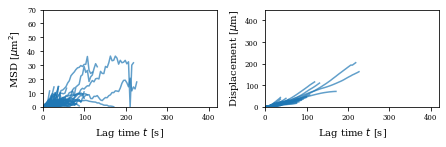

In [10]:
fig, axs = plt.subplots(1,2, figsize=(6.3,2.15))
l=1

for i in range(8):
    axs[0].plot(track_data_blanco[i].index, track_data_blanco[i],"C0" ,alpha=0.7)
    axs[0].grid()
    axs[0].set(xlim=(0,420), ylim=(0,70), xlabel=('Lag time $t$ [s]'), ylabel=(r'MSD [$\mu$m$^2$]'))
    axs[1].plot(sum_track_blanco[i].index, sum_track_blanco[i], "C0",alpha=0.7, label='')
    axs[1].grid()
    axs[1].set(xlim=(0,420), ylim=(0,450), xlabel=('Lag time $t$ [s]'), ylabel=(r'Displacement [$\mu$m]'))
fig.tight_layout()
#plt.savefig('plaatjes/trajecotries/MSD+displacement_blanco.png', dpi=600)


# Ciliobrevin

200 um


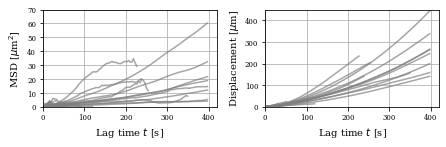

In [11]:
fig, axs = plt.subplots(1,2, figsize=(6.3,2.15))
i=7
l=len(track_data[i])
axs[0].plot(track_data[i].index, track_data[i],f"C{i}" ,alpha=0.7, label='')
axs[0].grid()
axs[0].set(xlim=(0,420), ylim=(0,70), xlabel=('Lag time $t$ [s]'), ylabel=(r'MSD [$\mu$m$^2$]'))
axs[1].plot(sum_track[i].index, sum_track[i], f"C{i}",alpha=0.7, label='')
axs[1].grid()
axs[1].set(xlim=(0,420), ylim=(0,450), xlabel=('Lag time $t$ [s]'), ylabel=(r'Displacement [$\mu$m]'))
fig.tight_layout()
#fig.suptitle("{}".format(Experiment[i]), fontsize=14)
print(Experiment[i])
plt.savefig('plaatjes/trajecotries/MSD+displacement_{}.png'.format(Experiment[i]), dpi=600)

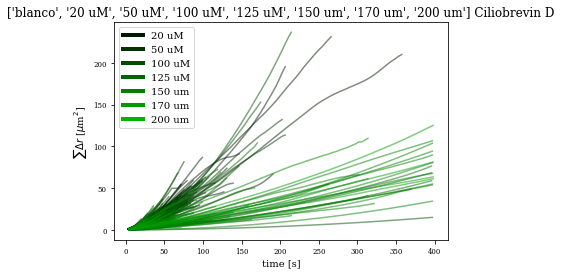

In [35]:
fig, ax = plt.subplots()
for i in range(6):
    i=i+1
    ax.plot(sum_track[i].index, sum_track[i],alpha=0.5, label=Experiment[i],color = (0, i / 10.0, 0, 1))
custom_lines = [Line2D([0], [0], color=(0, 1 / 10.0, 0, 1), lw=4),
                Line2D([0], [0], color=(0, 2 / 10.0, 0, 1), lw=4),
                Line2D([0], [0], color=(0, 3 / 10.0, 0, 1), lw=4),
                Line2D([0], [0], color=(0, 4 / 10.0, 0, 1), lw=4),
                Line2D([0], [0], color=(0, 5 / 10.0, 0, 1), lw=4),
                Line2D([0], [0], color=(0, 6 / 10.0, 0, 1), lw=4), 
                Line2D([0], [0], color=(0, 7 / 10.0, 0, 1), lw=4)]
ax.legend(custom_lines,(Experiment[1:8]))
ax.set(ylabel='$\sum \Delta r$ [$\mu$m$^2$]',xlabel='time [s]',title='{} Ciliobrevin D'.format(Experiment))
plt.savefig('plaatjes/Sum_Trajectories_{}.png'.format(Experiment))


# Velocity calculation 

In [47]:
dim_data={}

for i in range(7):
    i=i+1
    dim_data[i]= sum_track[i].shape
    
n_exp=len(sum_track)
print(n_exp)
bead_max=111
slope=np.zeros((8,bead_max,2))

for x in dim_data: #x is the experiment
    i=dim_data[x][1] # is the bead
    col=sum_track[x].columns
    for j in range(i): 
        df=sum_track[x][col[j]]
        ylim=np.count_nonzero(~np.isnan(df))
        df=df.iloc[0:ylim]
        slope[x][j][0] = np.linalg.lstsq(df.index[0:, np.newaxis], df,rcond=None)[0][0]
        resid= np.linalg.lstsq(df.index[:, np.newaxis], df,rcond=None)[1][0]
        slope[x][j][1] = 1 - resid / (df.size * df.var())
        

7


In [48]:
tot_beads = np.count_nonzero([item[:,0] for item in slope])
tot_slope_beads=[slope[np.nonzero(slope[:,:,0])],slope[np.nonzero(slope[:,:,1])]]
tot_slope_beads=tot_slope_beads[1]

#np.savetxt("{}".format(saveas), tot_slope_beads)
